Aleksandra Afonina: 15440117, Martin Ivanchev: 15425770

In [105]:
import pandas as pd

df = pd.read_csv("OnlineNewsPopularity.csv")
df.head()
print(df.columns.tolist())


['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', '

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


In [108]:
df.columns = df.columns.str.strip()
df['popular'] = (df['shares'] > 1400).astype(int)
df['popular'].value_counts(normalize=True)

popular
0    0.506558
1    0.493442
Name: proportion, dtype: float64

In [109]:
feature_cols = [col for col in df.columns if col not in ['url','shares', 'timedelta', 'popular']]
X = df[feature_cols]
y = df['popular']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [110]:
df.columns = df.columns.str.strip()
df.drop(columns=[
    'url',
    'timedelta',
], inplace=True)

print(df.columns.tolist())  


['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarit

In [111]:
print(df.columns.tolist())  

['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarit

In [112]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier

drop_cols =['shares','popular']
X= df.drop(columns=drop_cols)
y =df['popular']
X_train,X_test, y_train,y_test =train_test_split(
    X,y, test_size=0.2,random_state=42,stratify=y
)
scaler= StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s =scaler.transform(X_test)
lr =LogisticRegression(max_iter=3000)
lr.fit(X_train_s, y_train)
acc_lr_base = accuracy_score(y_test,lr.predict(X_test_s))
rf = RandomForestClassifier(n_estimators=300,random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
acc_rf_base = accuracy_score(y_test,rf.predict(X_test))

iso= IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_train_s) 

inliers= iso.predict(X_train_s) == 1
X_train_in= X_train.loc[inliers]
y_train_in= y_train.loc[inliers]
scaler2 =StandardScaler()
X_train_in_s = scaler2.fit_transform(X_train_in)
X_test_s2 = scaler2.transform(X_test)
lr2 = LogisticRegression(max_iter=3000)
lr2.fit(X_train_in_s, y_train_in)
acc_lr_if= accuracy_score(y_test, lr2.predict(X_test_s2))
rf2 = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf2.fit(X_train_in, y_train_in)
acc_rf_if = accuracy_score(y_test, rf2.predict(X_test))
print("Logistic Regression")
print("Baseline test accuracy:", round(acc_lr_base, 4))
print("IsolationForest test accuracy:", round(acc_lr_if, 4))
print("\nRandom Forest")
print("Baseline test accuracy:", round(acc_rf_base, 4))
print("IsolationForest test accuracy:", round(acc_rf_if, 4))
print("\nRemoved rows from training:", len(X_train) - len(X_train_in))


Logistic Regression
Baseline test accuracy: 0.6506
IsolationForest test accuracy: 0.6517

Random Forest
Baseline test accuracy: 0.6633
IsolationForest test accuracy: 0.6644

Removed rows from training: 318


Average originality of all articles: 0.3319881970851835
Median originality: 0.3302220018751967


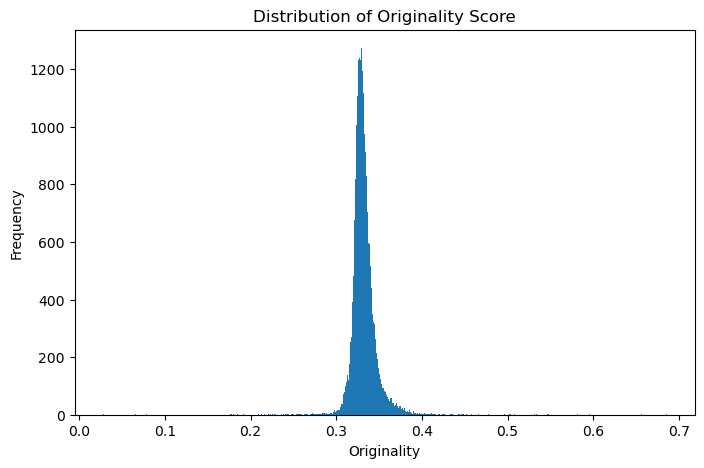

correlation:
                   originality3_new    shares
originality3_new          1.000000 -0.040749
shares                   -0.040749  1.000000


In [113]:
from sklearn.preprocessing import MinMaxScaler
df['lexical_diversity']= df['n_unique_tokens']/df['n_tokens_content']
df['lexical_diversity'] =df['lexical_diversity'].replace([np.inf, -np.inf], np.nan)
df['lexical_diversity']= df['lexical_diversity'].fillna(0)
tmp = df[['kw_avg_avg','kw_max_avg']].copy()
scaler_kw = MinMaxScaler()
tmp[['kw_avg_avg', 'kw_max_avg']] =scaler_kw.fit_transform(tmp[['kw_avg_avg', 'kw_max_avg']])

topic_popularity = 0.5*(tmp['kw_avg_avg'] + tmp['kw_max_avg'])
df['topic_niche'] = 1 -topic_popularity
df['keyword_density'] =df['num_keywords'] / df['n_tokens_content']
df['keyword_density']= df['keyword_density'].replace([np.inf, -np.inf], np.nan)
df['keyword_density']= df['keyword_density'].fillna(0)
orig3_new = df[['keyword_density', 'lexical_diversity', 'topic_niche']].copy()
scaler_orig = MinMaxScaler()
orig3_new[['keyword_density', 'lexical_diversity', 'topic_niche']] = scaler_orig.fit_transform(
    orig3_new[['keyword_density', 'lexical_diversity', 'topic_niche']]
)
df['originality3_new'] =orig3_new.mean(axis=1)
average_originality =df['originality3_new'].mean()
print("Average originality of all articles:", average_originality)
median_originality =df['originality3_new'].median()
print("Median originality:", median_originality)
plt.figure(figsize=(8,5))
plt.hist(df['originality3_new'], bins=1000)
plt.title("Distribution of Originality Score")
plt.xlabel("Originality")
plt.ylabel("Frequency")
plt.show()
cor = df[['originality3_new', 'shares']].corr()
print("correlation:\n", cor)

In [190]:
#Effort score definition
df["research_effort"] = df["num_hrefs"] + df["num_self_hrefs"]

writing_cols = ["n_tokens_content", "n_unique_tokens", "n_non_stop_unique_tokens", "n_tokens_title"]
scaler = StandardScaler()
df["writing_effort"]= scaler.fit_transform(df[writing_cols]).mean(axis=1)
df["media_effort"]= df["num_imgs"] + df["num_videos"]
topic_cols = ["LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04"]
df["topic_entropy"]= -(df[topic_cols] * np.log(df[topic_cols] + 1e-9)).sum(axis=1)
df["conceptual_effort"]= df["num_keywords"] 
effort_cols =["writing_effort", "research_effort", "media_effort", "topic_entropy", "conceptual_effort"]
df["total_effort_score"] = scaler.fit_transform(df[effort_cols]).mean(axis=1)

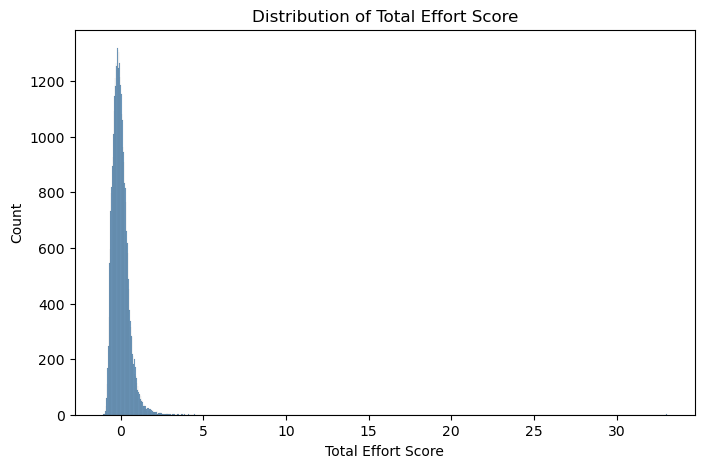

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["total_effort_score"], bins=1000, color="steelblue")
plt.title("Distribution of Total Effort Score")
plt.xlabel("Total Effort Score")
plt.ylabel("Count")
plt.show()

In [116]:
df[["total_effort_score", "shares"]].corr()

,total_effort_score,shares
total_effort_score,1.000000,0.044661
shares,0.044661,1.000000


In [117]:
X = df[["originality3_new"]]
y = df["popular"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf = RandomForestClassifier(random_state=42)

param_grid_rf_orig = {"n_estimators": [150, 400], "max_depth": [None, 5, 15], "max_features": ["sqrt", 0.5]}
grid_rf_orig = GridSearchCV(rf, param_grid_rf_orig,cv=5, scoring="accuracy", n_jobs=-1)
grid_rf_orig.fit(X_train, y_train)
print("Best RF parameters (originality):", grid_rf_orig.best_params_)
print("Best CV accuracy:", round(grid_rf_orig.best_score_, 3))

best_rf_orig = grid_rf_orig.best_estimator_
y_pred_rf = best_rf_orig.predict(X_test)

print("Test accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("\nClassification report (RF originality-only):")
print(classification_report(y_test, y_pred_rf, digits=3))

Best RF parameters (originality): {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150}
Best CV accuracy: 0.554
Test accuracy: 0.555

Classification report (RF originality-only):
              precision    recall  f1-score   support

           0      0.544     0.746     0.629      4017
           1      0.579     0.358     0.443      3912

    accuracy                          0.555      7929
   macro avg      0.562     0.552     0.536      7929
weighted avg      0.561     0.555     0.537      7929



In [118]:
pipe_mlp_orig = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier(max_iter=500, random_state=42))])

param_grid_mlp_orig = {"mlp__hidden_layer_sizes": [(32,), (64,), (64, 32)], "mlp__alpha": [0.0001, 0.001, 0.01]}

grid_mlp_orig = GridSearchCV(pipe_mlp_orig, param_grid_mlp_orig,cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_mlp_orig.fit(X_train, y_train)

print("Best MLP params (originality-only):", grid_mlp_orig.best_params_)
print("Best CV accuracy:", round(grid_mlp_orig.best_score_, 3))

best_mlp_orig = grid_mlp_orig.best_estimator_
y_pred_mlp = best_mlp_orig.predict(X_test)

print("Test accuracy:", round(accuracy_score(y_test, y_pred_mlp), 3))
print("\nClassification report (MLP originality-only):")
print(classification_report(y_test, y_pred_mlp, digits=3))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best MLP params (originality-only): {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (32,)}
Best CV accuracy: 0.555
Test accuracy: 0.553

Classification report (MLP originality-only):
              precision    recall  f1-score   support

           0      0.543     0.743     0.628      4017
           1      0.576     0.359     0.442      3912

    accuracy                          0.553      7929
   macro avg      0.560     0.551     0.535      7929
weighted avg      0.560     0.553     0.536      7929



In [119]:
X = df[["total_effort_score"]]
y = df["popular"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipe_mlp_effort = Pipeline([("scaler", StandardScaler()),("mlp", MLPClassifier(max_iter=500, random_state=42))])

param_grid_mlp_effort = {
    "mlp__hidden_layer_sizes": [(32,), (64,), (64, 32)], "mlp__alpha": [0.0001, 0.001, 0.01]}

grid_mlp_effort = GridSearchCV(estimator=pipe_mlp_effort,param_grid=param_grid_mlp_effort,cv=5,scoring="accuracy",n_jobs=-1)
grid_mlp_effort.fit(X_train, y_train)

print("Best MLP parameters (effort-only):", grid_mlp_effort.best_params_)
print("Best CV accuracy (effort-only):", round(grid_mlp_effort.best_score_, 3))

best_mlp_effort = grid_mlp_effort.best_estimator_
y_pred = best_mlp_effort.predict(X_test)

print("Tuned MLP test accuracy (effort-only):",
      round(accuracy_score(y_test, y_pred), 3))
print("\nClassification report (MLP effort-only):")
print(classification_report(y_test, y_pred, digits=3))

Best MLP parameters (effort-only): {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (64, 32)}
Best CV accuracy (effort-only): 0.541
Tuned MLP test accuracy (effort-only): 0.543

Classification report (MLP effort-only):
              precision    recall  f1-score   support

           0      0.541     0.638     0.586      4017
           1      0.545     0.445     0.490      3912

    accuracy                          0.543      7929
   macro avg      0.543     0.541     0.538      7929
weighted avg      0.543     0.543     0.538      7929



In [120]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Logistic regression for originality index
X = df[['originality3_new']]
y = df['popular']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("Test accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))
print("Coefficient for originality3_new:", log_reg.coef_[0][0])

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", round(cv_scores.mean(), 4))
print("CV scores:", cv_scores)


Test accuracy: 0.5496

Classification report:
               precision    recall  f1-score   support

           0      0.553     0.575     0.564      4017
           1      0.545     0.524     0.534      3912

    accuracy                          0.550      7929
   macro avg      0.549     0.549     0.549      7929
weighted avg      0.549     0.550     0.549      7929

Coefficient for originality3_new: -0.15764622390275526
Cross-validation accuracy: 0.5446
CV scores: [0.5395384  0.57031151 0.54483541 0.54319586 0.52535318]


In [121]:
#Logistic Regression effort
X = df[["total_effort_score"]]
y = df["popular"]

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

logreg =LogisticRegression()
logreg.fit(X_train, y_train)

y_pred= logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:",accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Test Accuracy: 0.5419346701980073

Classification Report:
              precision    recall  f1-score   support

           0      0.539     0.670     0.597      4017
           1      0.548     0.411     0.469      3912

    accuracy                          0.542      7929
   macro avg      0.543     0.540     0.533      7929
weighted avg      0.543     0.542     0.534      7929



In [122]:
#Random Forest effort
rf =RandomForestClassifier(random_state=42)

param_grid= {"n_estimators": [150, 300], "max_depth":[5, 10, 20],"min_samples_split": [2, 5, 10],"min_samples_leaf": [1, 4]}

grid_rf_effort= GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf_effort.fit(X_train, y_train)

print("Best parameters:",grid_rf_effort.best_params_)
print("Best CV accuracy:", grid_rf_effort.best_score_)
print("Test accuracy:", grid_rf_effort.score(X_test, y_test))

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best CV accuracy: 0.5410058332019549
Test accuracy: 0.5437003405221339


In [123]:
best_rf_effort = grid_rf_effort.best_estimator_
y_pred =best_rf_effort.predict(X_test)
print("\nClassification report (RF effort):")
print(classification_report(y_test, y_pred, digits=3))


Classification report (RF effort):
              precision    recall  f1-score   support

           0      0.540     0.667     0.597      4017
           1      0.550     0.417     0.474      3912

    accuracy                          0.544      7929
   macro avg      0.545     0.542     0.536      7929
weighted avg      0.545     0.544     0.536      7929



In [124]:
#drop new variables after we stop using them
df.drop(columns=[
    'lexical_diversity',
    'topic_niche',
    'keyword_density',
    'originality3_new',
    'research_effort',
    'writing_effort',
    'media_effort',
    'topic_entropy',
    'conceptual_effort',
    'total_effort_score'
], inplace=True)


In [125]:
#Random Forest all the features
rf= RandomForestClassifier(random_state=42, n_jobs=-1)

X =df[feature_cols]
y =df['popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

param_grid ={"n_estimators":[150, 400],"max_depth": [None, 5, 15], "max_features": ["sqrt", 0.5]}

grid_rf= GridSearchCV(estimator=rf,  param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best parameters:",grid_rf.best_params_)
print("Best CV accuracy:", grid_rf.best_score_)
print("Test accuracy:",grid_rf.score(X_test, y_test))

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 400}
Best CV accuracy: 0.6657417625729151
Test accuracy: 0.6652793542691386


In [126]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
drop_cols = ['shares', 'popular']
X = df.drop(columns=drop_cols)   
y = df['popular']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_clf = LogisticRegression(max_iter=1000)

cv =StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv= RFECV(estimator=log_clf,step=1,cv=cv,scoring='accuracy',n_jobs=-1)

rfecv.fit(X_scaled, y)

print("Optimal number of features:", rfecv.n_features_)
selected_features = X.columns[rfecv.support_]
print("Selected features:\n", selected_features)
all_features = X.columns.tolist()

print("Remaining features:")
for i, col in enumerate(all_features):
    print(f"{i}: {col}")

print("\nTotal number of features:", len(all_features))



Optimal number of features: 48
Selected features:
 Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_

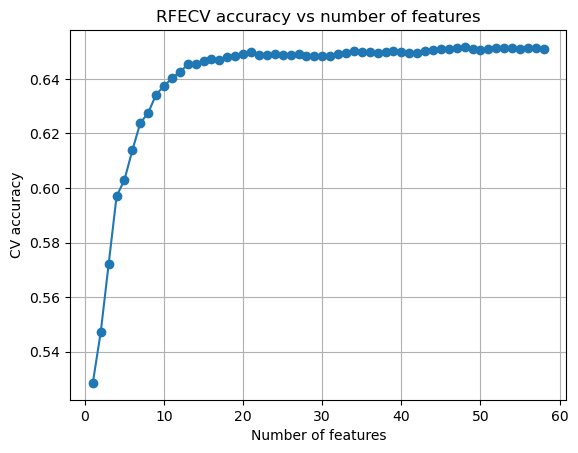

In [127]:
scores = rfecv.cv_results_['mean_test_score'] if hasattr(rfecv, 'cv_results_') else rfecv.grid_scores_
plt.plot(range(1,len(scores)+1), scores, marker='o')
plt.xlabel("Number of features")
plt.ylabel("CV accuracy")
plt.title("RFECV accuracy vs number of features")
plt.grid(True)
plt.show()


In [128]:
drop_cols = [ 'shares', 'popular']
X =df.drop(columns=drop_cols)
y= df['popular']

C_values = [0.001,0.002,1 ]

for C in C_values:
    print(f"LASSO Logistic Regression (C = {C})")
 
    lasso_model = Pipeline([("scaler", StandardScaler()),("lasso", LogisticRegression(
            penalty='l1',solver='liblinear',C=C,max_iter=5000 ))])

    lasso_model.fit(X, y)
    coef =lasso_model.named_steps["lasso"].coef_[0]
    selected_features= X.columns[coef != 0]
    print(f"Number of selected features: {len(selected_features)}")
    print("Selected features:")
    print(list(selected_features))


LASSO Logistic Regression (C = 0.001)
Number of selected features: 10
Selected features:
['num_hrefs', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_avg_avg', 'is_weekend', 'LDA_02']
LASSO Logistic Regression (C = 0.002)
Number of selected features: 20
Selected features:
['n_tokens_content', 'num_hrefs', 'num_imgs', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_friday', 'weekday_is_saturday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'global_subjectivity', 'rate_negative_words', 'title_sentiment_polarity']
LASSO Logistic Regression (C = 1)
Number of selected features: 56
Selected features:
['n_tokens_title', 'n_tokens_content', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_toke

In [129]:
drop_cols = ['shares', 'popular']
X = df.drop(columns=drop_cols)
y = df['popular'] 
mi_scores =mutual_info_classif(X, y, random_state=42)
mi_series= pd.Series(mi_scores, index=X.columns)
mi_top10 = mi_series.sort_values(ascending=False).head(10)
print("Top 10 features (Mutual Information)")
print(mi_top10, "\n")
mi_top20 =mi_series.sort_values(ascending=False).head(20)

print("Top 20 features (Mutual Information)")
print(mi_top20, "\n")

rf= RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1)
rf.fit(X, y)

rf_importance =pd.Series(rf.feature_importances_, index=X.columns)
rf_top10= rf_importance.sort_values(ascending=False).head(10)
print("Top 10 features (Random Forest)")
print(rf_top10, "\n")
print("Top 20 features (Random Forest)")
rf_top20 = rf_importance.sort_values(ascending=False).head(20)
print(rf_top20, "\n")
set_mi = set(mi_top10.index)
set_rf= set(rf_top10.index)
print("Intersection of the methods:")
print(set_mi &set_rf)

Top 10 features (Mutual Information)
kw_max_avg                    0.034447
LDA_02                        0.034015
LDA_04                        0.025605
LDA_03                        0.024549
kw_max_min                    0.023717
kw_avg_avg                    0.023158
LDA_01                        0.022922
LDA_00                        0.021988
self_reference_avg_sharess    0.020462
kw_min_avg                    0.019781
dtype: float64 

Top 20 features (Mutual Information)
kw_max_avg                       0.034447
LDA_02                           0.034015
LDA_04                           0.025605
LDA_03                           0.024549
kw_max_min                       0.023717
kw_avg_avg                       0.023158
LDA_01                           0.022922
LDA_00                           0.021988
self_reference_avg_sharess       0.020462
kw_min_avg                       0.019781
self_reference_min_shares        0.019146
kw_min_max                       0.015907
kw_avg_max     

In [130]:
import time
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

drop_cols =['shares','popular']
X_full= df.drop(columns=drop_cols)
y =df['popular']

features_lasso_10 = [
    'num_hrefs', 'num_keywords',
    'data_channel_is_entertainment', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world',
    'kw_min_min', 'kw_avg_avg', 'is_weekend', 'LDA_02']

features_mi_10 = [
    'kw_max_avg', 'LDA_02', 'LDA_04', 'LDA_03',
    'kw_max_min', 'kw_avg_avg', 
    'LDA_01', 'LDA_00','self_reference_avg_sharess', 'kw_min_avg']

features_rf_10 = [
    'kw_avg_avg', 'kw_max_avg','LDA_02', 'self_reference_min_shares',
    'kw_avg_max','LDA_04', 'LDA_01', 'kw_avg_min','self_reference_avg_sharess','LDA_00']


features_lasso_20 = [
    'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_keywords',
    'data_channel_is_entertainment', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world',
    'kw_min_min', 'kw_avg_avg', 'self_reference_avg_sharess',
    'weekday_is_friday', 'weekday_is_saturday', 'is_weekend',
    'LDA_00', 'LDA_01', 'LDA_02',
    'global_subjectivity', 'rate_negative_words', 'title_sentiment_polarity']

features_mi_20 =[
    'kw_max_avg','LDA_02', 'LDA_04', 'LDA_03', 'kw_max_min',
    'kw_avg_avg', 'LDA_01', 'LDA_00', 'self_reference_avg_sharess',
    'kw_min_avg', 'self_reference_min_shares', 'kw_min_max',
    'kw_avg_max', 'self_reference_max_shares', 'is_weekend',
    'data_channel_is_entertainment', 'num_hrefs', 'data_channel_is_world',
    'num_imgs', 'kw_avg_min']

features_rf_20 = [
    'kw_avg_avg', 'kw_max_avg','LDA_02', 'self_reference_min_shares',
    'kw_avg_max', 
    'LDA_04', 'LDA_01', 'kw_avg_min',
    'self_reference_avg_sharess', 'LDA_00',
    'global_subjectivity', 'n_non_stop_unique_tokens','n_unique_tokens',
    'average_token_length', 'LDA_03','n_tokens_content','kw_max_min',
    'global_rate_positive_words','avg_positive_polarity','global_sentiment_polarity'
]

feature_sets = {"LASSO_10":features_lasso_10,"LASSO_20": features_lasso_20,"MI_10":  features_mi_10,"MI_20":   features_mi_20,
    "RF_10": features_rf_10,
    "RF_20":features_rf_20,
}


In [131]:
models = {
    "LogReg": Pipeline([("scaler", StandardScaler()),("clf", LogisticRegression(max_iter=3000))]),
    "LinearSVC": Pipeline([("scaler", StandardScaler()),("clf", LinearSVC(max_iter=5000))]),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
}

results = []
for fs_name,fs_cols in feature_sets.items():
    X = X_full[fs_cols]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    for model_name, model in models.items():
        start= time.time()
        model.fit(X_train, y_train)
        train_time= time.time() - start
        y_pred_train =model.predict(X_train)
        y_pred_test =model.predict(X_test)
        acc_train =accuracy_score(y_train, y_pred_train)
        acc_test = accuracy_score(y_test, y_pred_test)
        results.append({
            "feature_set": fs_name,"n_features": len(fs_cols),"model": model_name,
            "train_acc":round(acc_train, 4),
            "test_acc": round(acc_test, 4),"train_time_sec": round(train_time, 4),
        })
results_df = pd.DataFrame(results)
results_df =results_df.sort_values(["model", "n_features", "feature_set"], ascending=[True, True, True]
)
print(results_df)


   feature_set  n_features         model  train_acc  test_acc  train_time_sec
1     LASSO_10          10     LinearSVC     0.6370    0.6394          0.0410
7        MI_10          10     LinearSVC     0.6135    0.6141          0.0515
13       RF_10          10     LinearSVC     0.6180    0.6185          0.0668
4     LASSO_20          20     LinearSVC     0.6414    0.6425          0.0855
10       MI_20          20     LinearSVC     0.6373    0.6360          0.2118
16       RF_20          20     LinearSVC     0.6246    0.6261          0.4485
0     LASSO_10          10        LogReg     0.6374    0.6380          0.0240
6        MI_10          10        LogReg     0.6160    0.6151          0.0200
12       RF_10          10        LogReg     0.6196    0.6214          0.0307
3     LASSO_20          20        LogReg     0.6442    0.6445          0.0301
9        MI_20          20        LogReg     0.6382    0.6385          0.0422
15       RF_20          20        LogReg     0.6239    0.6234   

In [132]:
print(df.columns.tolist())


['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarit

In [133]:
rf = RandomForestClassifier(random_state=42, max_depth = None, max_features= "sqrt", n_estimators = 400, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\nClassification report (RF all features):")
print(classification_report(y_test, y_pred, digits=3))


Classification report (RF all features):
              precision    recall  f1-score   support

           0      0.647     0.647     0.647      4017
           1      0.638     0.638     0.638      3912

    accuracy                          0.642      7929
   macro avg      0.642     0.642     0.642      7929
weighted avg      0.642     0.642     0.642      7929



In [134]:
#RF Selected features from LASSO feature selection
selected_features = ['n_tokens_content', 'num_hrefs','num_imgs','num_keywords',
    'data_channel_is_entertainment','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world',
    'kw_min_min','kw_avg_avg','self_reference_avg_sharess','weekday_is_friday','weekday_is_saturday','is_weekend','LDA_00','LDA_01','LDA_02',
    'global_subjectivity','rate_negative_words','title_sentiment_polarity']

X_sel = df[selected_features]
y = df["popular"]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y,test_size=0.2,random_state=42, stratify=y)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {"n_estimators": [150, 400], "max_depth": [None, 5, 15], "max_features": ["sqrt", 0.5]}
grid_rf_20 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf_20.fit(X_train, y_train)
print("\nBest parameters:", grid_rf_20.best_params_)
print("Best CV accuracy:", round(grid_rf_20.best_score_, 3))

best_rf_20 = grid_rf_20.best_estimator_
y_pred_20 = best_rf_20.predict(X_test)
print("Tuned RF test accuracy:", round(accuracy_score(y_test, y_pred), 3))


Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 400}
Best CV accuracy: 0.661
Tuned RF test accuracy: 0.642


In [135]:
print("\nClassification report (tuned RF):")
print(classification_report(y_test, y_pred_20, digits = 3))


Classification report (tuned RF):
              precision    recall  f1-score   support

           0      0.668     0.664     0.666      4017
           1      0.657     0.661     0.659      3912

    accuracy                          0.663      7929
   macro avg      0.663     0.663     0.663      7929
weighted avg      0.663     0.663     0.663      7929



In [136]:
#MLP Selected features from LASSO
selected_features = ['n_tokens_content', 'num_hrefs','num_imgs','num_keywords',
    'data_channel_is_entertainment','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world',
    'kw_min_min','kw_avg_avg','self_reference_avg_sharess','weekday_is_friday','weekday_is_saturday','is_weekend','LDA_00','LDA_01','LDA_02',
    'global_subjectivity','rate_negative_words','title_sentiment_polarity']

X_sel = df[selected_features]
y = df["popular"]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42, stratify=y)
pipe_mlp = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier(max_iter=500, random_state=42))])

param_grid_mlp = {
    "mlp__hidden_layer_sizes": [(32,),(64,), (64, 32)], "mlp__alpha": [0.0001, 0.001, 0.01],  # L2 regularization strength
}

grid_mlp = GridSearchCV(estimator=pipe_mlp, param_grid=param_grid_mlp,cv=5,scoring="accuracy",n_jobs=-1,)
grid_mlp.fit(X_train, y_train)

print("Best MLP parameters:", grid_mlp.best_params_)
print("Best CV accuracy:", round(grid_mlp.best_score_, 3))

best_mlp = grid_mlp.best_estimator_
y_pred = best_mlp.predict(X_test)

print("Tuned MLP test accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification report (tuned MLP):")
print(classification_report(y_test, y_pred, digits = 3))

Best MLP parameters: {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (32,)}
Best CV accuracy: 0.657
Tuned MLP test accuracy: 0.652

Classification report (tuned MLP):
              precision    recall  f1-score   support

           0      0.654     0.664     0.659      4017
           1      0.650     0.640     0.645      3912

    accuracy                          0.652      7929
   macro avg      0.652     0.652     0.652      7929
weighted avg      0.652     0.652     0.652      7929



In [137]:
#MLP ALL features
X_all = df[feature_cols]
y = df["popular"]

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42,stratify=y)
pipe_mlp_all = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier(max_iter=5000, random_state=42))])

param_grid_mlp_all = {
    "mlp__hidden_layer_sizes": [(32,), (64,),(64, 32)],"mlp__alpha": [0.0001, 0.001, 0.01],  # L2 regularization
}

grid_mlp_all = GridSearchCV(estimator=pipe_mlp_all,param_grid=param_grid_mlp_all, cv=5, scoring="accuracy", n_jobs=-1,)
grid_mlp_all.fit(X_train_all, y_train_all)

print("Best MLP parameters (all features):", grid_mlp_all.best_params_)
print("Best CV accuracy (all features):", round(grid_mlp_all.best_score_, 3))

best_mlp_all = grid_mlp_all.best_estimator_
y_pred_all = best_mlp_all.predict(X_test_all)

print("Tuned MLP test accuracy (all features):", round(accuracy_score(y_test_all, y_pred_all), 3))
print("\nClassification report (tuned MLP, all features):")
print(classification_report(y_test_all, y_pred_all, digits = 3))

Best MLP parameters (all features): {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (32,)}
Best CV accuracy (all features): 0.647
Tuned MLP test accuracy (all features): 0.649

Classification report (tuned MLP, all features):
              precision    recall  f1-score   support

           0      0.647     0.675     0.661      4017
           1      0.651     0.622     0.636      3912

    accuracy                          0.649      7929
   macro avg      0.649     0.649     0.649      7929
weighted avg      0.649     0.649     0.649      7929



In [138]:
X_sel = df[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sel)
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

print(df["cluster"].value_counts())
popularity_by_cluster = df.groupby("cluster")["popular"].mean()
print(popularity_by_cluster)

cluster
0    24841
3     8280
2     4200
1     2323
Name: count, dtype: int64
cluster
0    0.516525
1    0.714163
2    0.531429
3    0.342995
Name: popular, dtype: float64


In [139]:
cluster_summary = df.groupby('cluster')[selected_features].mean()
print(cluster_summary)

         n_tokens_content  num_hrefs  num_imgs  num_keywords  \
cluster                                                        
0              529.250030  10.903305  5.107001      7.261986   
1              609.628067  13.176065  4.290142      6.552303   
2              510.171667  10.911667  4.843095      7.263095   
3              599.039010  10.167512  2.775121      7.277536   

         data_channel_is_entertainment  data_channel_is_socmed  \
cluster                                                          
0                             0.244918                     0.0   
1                             0.000000                     1.0   
2                             0.231429                     0.0   
3                             0.000121                     0.0   

         data_channel_is_tech  data_channel_is_world  kw_min_min   kw_avg_avg  \
cluster                                                                         
0                    0.255908               0.001328   2

In [140]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

drop_cols = ['shares','popular']
X_full = df.drop(columns=drop_cols)
y = df['popular']
features_lasso_20 = [
    'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_keywords',
    'data_channel_is_entertainment','data_channel_is_socmed',
    'data_channel_is_tech','data_channel_is_world','kw_min_min', 'kw_avg_avg', 'self_reference_avg_sharess',
    'weekday_is_friday','weekday_is_saturday', 'is_weekend',
    'LDA_00','LDA_01','LDA_02', 'global_subjectivity','rate_negative_words', 'title_sentiment_polarity']

feature_sets = { "All": X_full.columns.tolist(),"20 (LASSO)": features_lasso_20
}
X_train_full, X_test_full ,y_train,y_test = train_test_split(X_full,   y, test_size=0.2,random_state=42, stratify=y)
pipe =Pipeline([("scaler",StandardScaler()),("clf",    LogisticRegression(max_iter=3000))
])
rows = []
for name, cols in feature_sets.items():
    X_train= X_train_full[cols]
    X_test =X_test_full[cols]

    start =time.time()
    pipe.fit(X_train, y_train)
    train_time= time.time() - start

    y_pred =pipe.predict(X_test)

    rows.append({"Algorithms": "Logistic Regression","Number of Features": name,"Best Parameters": "-",
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),"Precision": round(precision_score(y_test, y_pred), 4),"Recall": round(recall_score(y_test, y_pred), 4),"F1-score": round(f1_score(y_test, y_pred), 4),
        "Train Time (sec)": round(train_time, 4)
    })
results_table = pd.DataFrame(rows)
print(results_table)
print(df.columns.tolist())



            Algorithms Number of Features Best Parameters  Accuracy  \
0  Logistic Regression                All               -    0.6508   
1  Logistic Regression         20 (LASSO)               -    0.6445   

   Precision  Recall  F1-score  Train Time (sec)  
0     0.6516  0.6278    0.6395            0.3702  
1     0.6432  0.6276    0.6353            0.0310  
['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_w

In [141]:
print(df.columns.tolist())


['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarit

In [142]:
from sklearn.ensemble import RandomForestClassifier
drop_cols = ['shares', 'popular']
X_full = df.drop(columns=drop_cols)
y = df['popular']

features_lasso_20 = [
    'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_keywords',
    'data_channel_is_entertainment', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world',
    'kw_min_min', 'kw_avg_avg', 'self_reference_avg_sharess',
    'weekday_is_friday', 'weekday_is_saturday', 'is_weekend',
    'LDA_00', 'LDA_01', 'LDA_02',
    'global_subjectivity', 'rate_negative_words', 'title_sentiment_polarity'
]

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)
rf_all = RandomForestClassifier(n_estimators=400, max_features="sqrt", random_state=42, n_jobs=-1)
rf_lasso = RandomForestClassifier(max_depth=15,n_estimators=400, max_features="sqrt", random_state=42, n_jobs=-1)
start = time.time()
rf_all.fit(X_train_full, y_train)
time_all = time.time() - start
pred_all = rf_all.predict(X_test_full)
X_train_lasso = X_train_full[features_lasso_20]
X_test_lasso = X_test_full[features_lasso_20]

start = time.time()
rf_lasso.fit(X_train_lasso, y_train)
time_lasso = time.time() -start

pred_lasso = rf_lasso.predict(X_test_lasso)

results_table_rf = pd.DataFrame([
    {
        "Algorithms": "Random Forest","Number of Features": "All","Best Parameters": "-",
        "Accuracy": round(accuracy_score(y_test, pred_all), 4),
        "Precision": round(precision_score(y_test, pred_all), 4),"Recall": round(recall_score(y_test, pred_all), 4),"F1-score": round(f1_score(y_test, pred_all), 4),
        "Train Time (sec)": round(time_all, 4)
    },
    {
        "Algorithms": "Random Forest",
        "Number of Features": "20 (LASSO)","Best Parameters": "-",
        "Accuracy": round(accuracy_score(y_test, pred_lasso), 4),
        "Precision": round(precision_score(y_test, pred_lasso), 4),"Recall": round(recall_score(y_test, pred_lasso), 4),
        "F1-score": round(f1_score(y_test, pred_lasso), 4),"Train Time (sec)": round(time_lasso, 4)
    }
])

print(results_table_rf)

print(df.columns.tolist())


      Algorithms Number of Features Best Parameters  Accuracy  Precision  \
0  Random Forest                All               -    0.6648     0.6599   
1  Random Forest         20 (LASSO)               -    0.6626     0.6572   

   Recall  F1-score  Train Time (sec)  
0  0.6616    0.6607            4.8098  
1  0.6610    0.6591            2.1378  
['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekda

In [143]:
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


drop_cols = ['shares', 'popular']
X_all = df.drop(columns=drop_cols)
y = df['popular'].values


features_lasso_20 = [
    'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_keywords',
    'data_channel_is_entertainment', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world',
    'kw_min_min', 'kw_avg_avg', 'self_reference_avg_sharess',
    'weekday_is_friday', 'weekday_is_saturday', 'is_weekend',
    'LDA_00', 'LDA_01', 'LDA_02',
    'global_subjectivity', 'rate_negative_words', 'title_sentiment_polarity'
]

X_lasso20 = X_all[features_lasso_20].values


scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

pca = PCA(n_components=20, random_state=42)
X_pca20 = pca.fit_transform(X_all_scaled)


idx = np.arange(len(y))
idx_train, idx_test = train_test_split(
    idx, test_size=0.2, random_state=42, stratify=y
)

X_l_train, X_l_test = X_lasso20[idx_train], X_lasso20[idx_test]
X_p_train, X_p_test = X_pca20[idx_train], X_pca20[idx_test]
y_train, y_test = y[idx_train], y[idx_test]


scaler_lasso = StandardScaler()
X_l_train_s = scaler_lasso.fit_transform(X_l_train)
X_l_test_s = scaler_lasso.transform(X_l_test)

X_p_train_s, X_p_test_s = X_p_train, X_p_test
results = []
logreg = LogisticRegression(max_iter=5000)
for rep_name, (X_tr, X_te) in {
    "LASSO_20_scaled": (X_l_train_s, X_l_test_s),
    "PCA_20":          (X_p_train_s, X_p_test_s)
}.items():
    start = time.time()
    logreg.fit(X_tr, y_train)
    train_time = time.time() - start

    acc_train = accuracy_score(y_train, logreg.predict(X_tr))
    acc_test = accuracy_score(y_test, logreg.predict(X_te))

    results.append({"representation": rep_name,"n_features": 20,
        "model": "LogReg","train_acc": round(acc_train, 4),
        "test_acc": round(acc_test, 4),"train_time_sec": round(train_time, 4),
    })

results_df = pd.DataFrame(results)
print("LASSO_20  vs PCA_20 ")
print(results_df)


LASSO_20  vs PCA_20 
    representation  n_features   model  train_acc  test_acc  train_time_sec
0  LASSO_20_scaled          20  LogReg     0.6442    0.6445          0.0220
1           PCA_20          20  LogReg     0.6337    0.6335          0.0171
